# Import Necessary Library

In [1]:
import json
import nltk

!pip install nlp_utils
import pandas as pd
import numpy as np
import torch
import pickle
import tqdm
import random

from collections import Counter

import string
string.punctuation
!pip install langid
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
#nltk.download('punkt')
#nltk.download('stopwords')

!pip install stop-words
!pip install stop-words

from stop_words import get_stop_words

#!pip install googletrans==4.0.0-rc1
!pip install indic-transliteration
from indic_transliteration import sanscript

# Define the source and target scripts
source_script = sanscript.DEVANAGARI
target_script = sanscript.ITRANS

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.naive_bayes import MultinomialNB

# Open the JSON file

In [3]:
# Open and parse the Training JSON file
with open('.//MaSaC_train_erc.json', 'r') as json_file:
    train_data = json.load(json_file)

In [4]:
train_data[0]

{'episode': 'roseshantstobeadopted.wmv',
 'speakers': ['maya',
  'indu',
  'rosesh',
  'indu',
  'maya',
  'indu',
  'rosesh',
  'indu',
  'sahil',
  'rosesh',
  'maya',
  'indu',
  'sahil',
  'monish',
  'maya',
  'indu',
  'maya',
  'indu',
  'indu',
  'maya',
  'rosesh',
  'maya'],
 'utterances': ['kya kya bhar ke rakha hai indravadan ne is ghar mein indravadan please tum sari bekar ki chijen bahar kyon nahin fekte?',
  'ok, chalo rosesh chalo bahar',
  'momma! hath chhodiye dad!',
  'dekho maya ya na bol raha hai! fir tum hi kahogi faltu chijen jama karte ho fekte nahin ho, chalo',
  'indravadan, tum kitne salo se ye joke maar rahe ho. koi hota hai aaj tak?',
  'kaikai pe joke maroge to manthra thodi na hasegi',
  'very funny',
  'maya, monisha aur sahil aa rahe hain, dekhna yahi jo un per istemal karta hun aur dekhna vah kitna haste hain',
  'hi guys',
  'hi',
  'hi darling. achcha indravadan, please ya kachra bahar fenko!',
  'ok maya, chalo rosesh tumhen bahar fenk au',
  'mom! 

In [5]:
# Open and parse the validation JSON file
with open('.//MaSaC_val_erc.json', 'r') as json_file:
    validation_data = json.load(json_file)

In [6]:
validation_data[0]

{'episode': 'roseshantstobeadopted.wmv',
 'speakers': ['good rosesh',
  'bad rosesh',
  'good rosesh',
  'bad rosesh',
  'good rosesh',
  'bad rosesh',
  'good rosesh',
  'bad rosesh',
  'good rosesh',
  'rosesh',
  'rosesh',
  'maya',
  'rosesh'],
 'utterances': ['ye kya kar raha hai rosesh? bharat tera desh! bhartiya insan hai saccha. kisi ka khat padhna nahin hai achcha.',
  'hahaha khat padh le rosesh baby or padhne de hamen bhi. kitna achcha lagta hai balon mein gel, ding dong bell.',
  'kavita acchi hai lekin khayal achcha nahin hai, villain rosesh. momma ne kaha hai kisi aur ka khat padhna galat baat hai',
  'galat hai, par momma ne tumse kaha tha ki do bar brush karna aur tumne sirf ek bar kiya tha kya vah galat nahin tha?',
  'galat tha per',
  'momma ne tumse jab green chatni mangi thi aur tumne red pass ki thi kya vah galat nahin tha?',
  'wo to galat tha',
  'pichhle sal momma ki nayi hair style ostrich jesi thi aur tumne unhen apsara kaha tha kya vah galat nahin tha?',
  '

# Total number of episode in Training Data

In [7]:
# Create a list to store  episode names
total_episodes_1 = []

for conversation in train_data:
    episode = conversation["episode"]

    # Add the episode name to the set of unique episodes
    total_episodes_1.append(episode)


# Print the total number of  conversation topics or episodes
print("Total episode topics:", len(total_episodes_1))

Total episode topics: 343


# Distinct Episode name in Training coversation

In [8]:
# Convert the list of episode names to a set to get unique episodes
unique_episodes_1 = set(total_episodes_1)

# Print the unique episode names
print("Unique episode names:", unique_episodes_1)

# Print the total number of unique episodes
print("Total unique episodes:", len(unique_episodes_1))

Unique episode names: {'roseshantstobeadopted.wmv', 'husbandsdonotcheat.avi', 'mayadoubtsindravardhan.wmv', 'dushyant', 'doggy', 'popatlal', 'newcar', 'baldev', 'monishaadaptstohighsociety', 'roseshpoetrypublication.wmv', 'monishacomplainsofsahil.wmv', 'scrabblecompetition.avi', 'mayaleavesindravardhan(1) (1).wmv', 'kavi.wmv', 'african', 'mayaonacleaningdrive.wmv', 'playatcharityfunction', 'sahilmarriesmonisha.wmv', 'finale.avi', 'mayabetmonisha.wmv', 'mayanighmare', 'monishasuicideattempt.wmv', 'radhabaileaves', 'jugalkishore.wmv', 'mayamonishabday.avi', 'lease2.wmv', 'roseshnayadon.wmv', 'lease1.wmv', 'prankonindravadhan', 'neelimaverma.wmv', 'cricket.wmv', 'khilawal.wmv', 'prefinale', 'patang', 'bachelor.wmv', 'monishasspeechonmaya.wmv', 'video1.wmv', 'mayaleavesindravardhan.wmv', 'sharman.wmw', 'roseshmarriesrita.wmw', 'indravadanmissing.avi', 'soniyaprediction.avi', 'bachlorparty', 'yamraj.wmv', 'sahillovestory.wmv', 'jaspal.wmv', 'introductiontothesarabhaifamily.avi', 'roseshacci

In [9]:
total_episodes_1

episode_counts = {}

for episode_title in total_episodes_1:
    episode_counts[episode_title] = episode_counts.get(episode_title, 0) + 1

for title, count in episode_counts.items():
    print(f"{title} occurs {count} times")

roseshantstobeadopted.wmv occurs 5 times
video1.wmv occurs 8 times
yamraj.wmv occurs 7 times
finale.avi occurs 13 times
indravadanmissing.avi occurs 7 times
sharman.wmw occurs 6 times
soniyaprediction.avi occurs 7 times
bachelor.wmv occurs 7 times
cricket.wmv occurs 8 times
husbandsdonotcheat.avi occurs 11 times
introductiontothesarabhaifamily.avi occurs 6 times
jugalkishore.wmv occurs 8 times
kavi.wmv occurs 4 times
lease1.wmv occurs 8 times
lease2.wmv occurs 7 times
mayaleavesindravardhan(1) (1).wmv occurs 6 times
mayadoubtsindravardhan.wmv occurs 6 times
jaspal.wmv occurs 5 times
khilawal.wmv occurs 4 times
mayabetmonisha.wmv occurs 10 times
mayaleavesindravardhan.wmv occurs 6 times
mayamonishabday.avi occurs 6 times
mayanighmare occurs 5 times
mayaonacleaningdrive.wmv occurs 9 times
monishaadaptstohighsociety occurs 6 times
roseshnayadon.wmv occurs 5 times
roseshmarriesrita.wmw occurs 6 times
roseshpoetrypublication.wmv occurs 6 times
sahillovestory.wmv occurs 5 times
sahilmarriesm

In [10]:
import pandas as pd


# Create an empty list to store the data for each conversation
conversation_data = []

# Iterate through the JSON data and construct a DataFrame for each conversation
for conversation in train_data:
    episode = conversation["episode"]
    speakers = conversation["speakers"]
    utterances = conversation["utterances"]
    emotions = conversation["emotions"]

    # Create a DataFrame for the current conversation
    df = pd.DataFrame({
        "Episode": [episode] * len(speakers),
        "Speakers": speakers,
        "Utterances": utterances,
        "Emotions": emotions
    })

    # Append the DataFrame to the list
    conversation_data.append(df)

# Concatenate all conversation DataFrames into one DataFrame
train_df = pd.concat(conversation_data, ignore_index=True)
train_df.head(5)

,Episode,Speakers,Utterances,Emotions
0,roseshantstobeadopted.wmv,maya,kya kya bhar ke rakha hai indravadan ne is gha...,disgust
1,roseshantstobeadopted.wmv,indu,"ok, chalo rosesh chalo bahar",contempt
2,roseshantstobeadopted.wmv,rosesh,momma! hath chhodiye dad!,anger
3,roseshantstobeadopted.wmv,indu,dekho maya ya na bol raha hai! fir tum hi kaho...,neutral
4,roseshantstobeadopted.wmv,maya,"indravadan, tum kitne salo se ye joke maar rah...",neutral


In [11]:
#validation_data

In [12]:
import pandas as pd


# Create an empty list to store the data for each conversation
conversation_data = []

# Iterate through the JSON data and construct a DataFrame for each conversation
for conversation in validation_data:
    episode = conversation["episode"]
    speakers = conversation["speakers"]
    utterances = conversation["utterances"]
    emotions = conversation["emotions"]

    # Create a DataFrame for the current conversation
    df = pd.DataFrame({
        "Episode": [episode] * len(speakers),
        "Speakers": speakers,
        "Utterances": utterances,
        "Emotions": emotions
    })

    # Append the DataFrame to the list
    conversation_data.append(df)

# Concatenate all conversation DataFrames into one DataFrame
val_df = pd.concat(conversation_data, ignore_index=True)
val_df.head(5)

,Episode,Speakers,Utterances,Emotions
0,roseshantstobeadopted.wmv,good rosesh,ye kya kar raha hai rosesh? bharat tera desh! ...,neutral
1,roseshantstobeadopted.wmv,bad rosesh,hahaha khat padh le rosesh baby or padhne de h...,neutral
2,roseshantstobeadopted.wmv,good rosesh,kavita acchi hai lekin khayal achcha nahin hai...,neutral
3,roseshantstobeadopted.wmv,bad rosesh,"galat hai, par momma ne tumse kaha tha ki do b...",contempt
4,roseshantstobeadopted.wmv,good rosesh,galat tha per,neutral


In [13]:
# Find distinct emotions
distinct_emotions = train_df['Emotions'].unique()

# Print distinct emotions
print("Distinct Emotions:")
for emotion in distinct_emotions:
    print(emotion)

Distinct Emotions:
disgust
contempt
anger
neutral
joy
sadness
fear
surprise


In [14]:
# Find distinct emotions
distinct_emotions = val_df['Emotions'].unique()

# Print distinct emotions
print("Distinct Emotions:")
for emotion in distinct_emotions:
    print(emotion)

Distinct Emotions:
neutral
contempt
sadness
fear
joy
surprise
anger
disgust


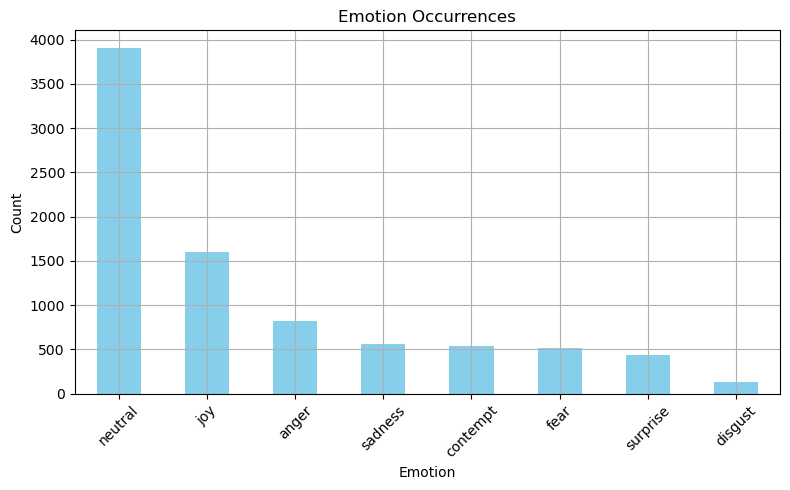

In [15]:
# Count the occurrences of each emotion
emotion_counts = train_df['Emotions'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 5))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Emotion Occurrences')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
# Show the plot
plt.show()

In [16]:
hindi_stopwords = get_stop_words('hi')  # 'hi' is the ISO 639-1 code for Hindi
hindi_stopwords

# Transliterate Hindi to Roman script (English characters)
transliterated_text = [sanscript.transliterate(word, source_script, target_script) for word in hindi_stopwords]

# Convert transliterated words to lowercase
lowercase_transliterated_text = [word.lower() for word in transliterated_text]


# combined list of stopwords for both English and Hindi

In [17]:
english_stopwords = set(stopwords.words('english'))
stop_words = set(english_stopwords)  # English stopwords

# Add Hindi stopwords to the set
hindi_stop_words = set(lowercase_transliterated_text)  # Add your Hindi stopwords here

stop_words.update(hindi_stop_words)
#stop_words

# Preprocessing code for each utterance

In [18]:
import re

def remove_numeric_sequences_and_ordinals(text):
    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove ordinal numbers
    text = re.sub(r'\b\d+(st|nd|rd|th)\b', '', text)

    return text

In [19]:
def remove_puntuations(txt):
    punct = set(string.punctuation)
    txt = " ".join(txt.split("."))
    txt = " ".join(txt.split("!"))
    txt = " ".join(txt.split("?"))
    txt = " ".join(txt.split(":"))
    txt = " ".join(txt.split(";"))
    
    txt = "".join(ch for ch in txt if ch not in punct)
    return txt

In [20]:
# Function clean text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    #remove numeric and ordinals 
    text = remove_numeric_sequences_and_ordinals(text)

    # Remove punctuation
    text = remove_puntuations(text)

    # Remove extra white spaces
    text = ' '.join(text.split())

    # Remove stopwords
    total_stop_words = stop_words
    text = ' '.join([word for word in text.split() if word not in total_stop_words])

    return text

In [21]:
preprocess_text('kya kya bhar ke rakha hai indravadan ne is gha...')

'kya kya bhar rakha indravadan gha'

In [22]:
# Apply preprocessing to the 'Utterances' column
train_df['Clean_text'] = train_df['Utterances'].apply(preprocess_text)

# Print the first few rows of the modified DataFrame
train_df

,Episode,Speakers,Utterances,Emotions,Clean_text
0,roseshantstobeadopted.wmv,maya,kya kya bhar ke rakha hai indravadan ne is gha...,disgust,kya kya bhar rakha indravadan ghar mein indrav...
1,roseshantstobeadopted.wmv,indu,"ok, chalo rosesh chalo bahar",contempt,ok chalo rosesh chalo bahar
2,roseshantstobeadopted.wmv,rosesh,momma! hath chhodiye dad!,anger,momma hath chhodiye dad
3,roseshantstobeadopted.wmv,indu,dekho maya ya na bol raha hai! fir tum hi kaho...,neutral,dekho maya bol fir tum kahogi faltu chijen jam...
4,roseshantstobeadopted.wmv,maya,"indravadan, tum kitne salo se ye joke maar rah...",neutral,indravadan tum kitne salo joke maar aaj tak
...,...,...,...,...,...
8501,radhabaileaves,rosesh,lekin what about my ghadi? 17000 ki ghadi hai ...,sadness,lekin ghadi ghadi momma recurring alarm baje a...
8502,radhabaileaves,sita or geeta,"nhi nhi mujhe yahan pe kaamich nhi karna hai, ...",anger,nhi nhi mujhe yahan kaamich nhi karna jaa rhi hun
8503,radhabaileaves,maya,ahan!,joy,ahan
8504,radhabaileaves,sita or geeta,goodbye!,fear,goodbye


In [23]:
# Apply preprocessing to the 'Utterances' column
val_df['Clean_text'] = val_df['Utterances'].apply(preprocess_text)

# Print the first few rows of the modified DataFrame
val_df

,Episode,Speakers,Utterances,Emotions,Clean_text
0,roseshantstobeadopted.wmv,good rosesh,ye kya kar raha hai rosesh? bharat tera desh! ...,neutral,kya kar rosesh bharat tera desh bhartiya insan...
1,roseshantstobeadopted.wmv,bad rosesh,hahaha khat padh le rosesh baby or padhne de h...,neutral,hahaha khat padh le rosesh baby padhne de hame...
2,roseshantstobeadopted.wmv,good rosesh,kavita acchi hai lekin khayal achcha nahin hai...,neutral,kavita acchi lekin khayal achcha nahin villain...
3,roseshantstobeadopted.wmv,bad rosesh,"galat hai, par momma ne tumse kaha tha ki do b...",contempt,galat par momma tumse bar brush karna aur tumn...
4,roseshantstobeadopted.wmv,good rosesh,galat tha per,neutral,galat per
...,...,...,...,...,...
1349,prefinale,monish,sahil sahil sahil. sirf 4 din bache hai or sar...,fear,sahil sahil sahil sirf din bache sari ladkiyan...
1350,prefinale,sahil,haan lekin mom unn charo me se kisi ek ko fina...,neutral,haan lekin mom unn charo ek finalise kar lengi
1351,prefinale,monish,mummy ji ko to unme se koi pasand nhi hai,sadness,mummy ji unme pasand nhi
1352,prefinale,sahil,rosesh ko?,neutral,rosesh


In [24]:
train = train_df[["Emotions","Clean_text"]]
train

,Emotions,Clean_text
0,disgust,kya kya bhar rakha indravadan ghar mein indrav...
1,contempt,ok chalo rosesh chalo bahar
2,anger,momma hath chhodiye dad
3,neutral,dekho maya bol fir tum kahogi faltu chijen jam...
4,neutral,indravadan tum kitne salo joke maar aaj tak
...,...,...
8501,sadness,lekin ghadi ghadi momma recurring alarm baje a...
8502,anger,nhi nhi mujhe yahan kaamich nhi karna jaa rhi hun
8503,joy,ahan
8504,fear,goodbye


In [25]:
# Assuming train is the DataFrame containing the 'Clean_text' column
max_words = train['Clean_text'].apply(lambda x: len(x.split())).max()
print(f"The maximum number of words in an utterance is: {max_words}")

The maximum number of words in an utterance is: 94


In [26]:
# Assuming 'train' is the DataFrame containing the 'Clean_text' column
max_words_index = train['Clean_text'].apply(lambda x: len(x.split())).idxmax()
print(f"The index number of the row with the maximum number of words: {max_words_index}")

The index number of the row with the maximum number of words: 2315


In [27]:
train["Clean_text"][2315]

'khar khar khar khar chale cinema reel cinema parde par aaya sushil sushil acting uske muscles kartein hain cehera hain blank mara kabootar dailogue bole lagta hain bigda hain padooshi scooter sushil heroine sandhya kapde jitne taklu saar par hoon baal aage suniyega sandhya acche dete hain chipkaali expression sandhya acche deti hain chipkali expression lekin phirbhi sandhya banega best actress iss saal sushil muscles milega award kyuki uske papa hain jury par samjhe picture deenge start critics kyuki wo hain producers chaamche phir main jaa kar dekhte hoon kyu kyu main dard hain'

In [28]:
validation = val_df[["Emotions","Clean_text"]]

In [29]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the 'clean_text' column
unique_words = set(' '.join(train['Clean_text']).split())
sorted_unique_words = sorted(unique_words)
len(sorted_unique_words)

10669

In [30]:
sorted_unique_words[0:10]

['aa',
 'aaa',
 'aaaa',
 'aaaaa',
 'aaaaaa',
 'aaaaaannneeee',
 'aaaaah',
 'aaah',
 'aaahaaahaaa',
 'aaahh']

In [31]:
word_to_index = {word: index for index, word in enumerate(sorted_unique_words)}
#word_to_index

# Add one words for unknown words

In [32]:
word_to_index['unknown_word'] = len(word_to_index)
sorted_unique_words.append('unknown_word')

In [33]:
sorted_unique_words[-1]

'unknown_word'

# Vectorize the text

In [34]:
import numpy as np

# Function to vectorize the text
def vectorize_text(text, unique_words_list):
    word_to_index = {word: index for index, word in enumerate(unique_words_list)}
    total_length = len(unique_words_list)
    sentence_vector = np.zeros(total_length)
    
    words = text.split()
    for word in words:
        if word in word_to_index:
            word_vector = np.zeros(total_length)
            word_vector[word_to_index[word]] = 1
            sentence_vector += word_vector 
        else:
            word_vector = np.zeros(total_length)
            word_vector[-1] = 1
            sentence_vector += word_vector

    # Normalize the sentence vector by dividing by the total length of the sentence
    if len(words) > 0:
        sentence_vector /= len(words)
    
    return sentence_vector

# Creating a dictionary to store the vectors
vectors_dict = {}

for index, row in train.iterrows():
    vectors_dict[index] = vectorize_text(row['Clean_text'], sorted_unique_words)

# Printing the vector for each row
#for index, vector in vectors_dict.items():
    #print(f"Vector for utterance {index}: {vector}")

In [35]:
np.sum(vectors_dict[0])

0.9999999999999999

# Fit the RNN model

In [41]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import torch.nn.functional as F
from transformers import BertTokenizer, BertConfig,AdamW, BertForSequenceClassification,get_linear_schedule_with_warmup


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
# Import and evaluate each test batch using Matthew's correlation coefficient
from sklearn.metrics import accuracy_score,matthews_corrcoef

from tqdm import tqdm, trange,tnrange,tqdm_notebook
import random
import os
import io
#% matplotlib inline

2023-11-09 19:36:20.480484: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-09 19:36:21.702137: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-09 19:36:21.702180: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-09 19:36:21.706498: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-09 19:36:22.335867: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-09 19:36:22.340400: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [43]:
df = train_df
df.head(2)

,Episode,Speakers,Utterances,Emotions,Clean_text
0,roseshantstobeadopted.wmv,maya,kya kya bhar ke rakha hai indravadan ne is gha...,disgust,kya kya bhar rakha indravadan ghar mein indrav...
1,roseshantstobeadopted.wmv,indu,"ok, chalo rosesh chalo bahar",contempt,ok chalo rosesh chalo bahar


In [45]:
df1 = val_df
df1.head(2)

,Episode,Speakers,Utterances,Emotions,Clean_text
0,roseshantstobeadopted.wmv,good rosesh,ye kya kar raha hai rosesh? bharat tera desh! ...,neutral,kya kar rosesh bharat tera desh bhartiya insan...
1,roseshantstobeadopted.wmv,bad rosesh,hahaha khat padh le rosesh baby or padhne de h...,neutral,hahaha khat padh le rosesh baby padhne de hame...


In [46]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['label_enc'] = labelencoder.fit_transform(df['Emotions'])

In [47]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df1['label_enc'] = labelencoder.fit_transform(df1['Emotions'])

In [48]:
df.head(1)

,Episode,Speakers,Utterances,Emotions,Clean_text,label_enc
0,roseshantstobeadopted.wmv,maya,kya kya bhar ke rakha hai indravadan ne is gha...,disgust,kya kya bhar rakha indravadan ghar mein indrav...,2


In [49]:
df1.head(1)

,Episode,Speakers,Utterances,Emotions,Clean_text,label_enc
0,roseshantstobeadopted.wmv,good rosesh,ye kya kar raha hai rosesh? bharat tera desh! ...,neutral,kya kar rosesh bharat tera desh bhartiya insan...,5


In [63]:
df.rename(columns={'Emotions':'label_desc'},inplace=True)
df.rename(columns={'label_enc':'label'},inplace=True)

/tmp/ipykernel_37531/59600658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Emotions':'label_desc'},inplace=True)
/tmp/ipykernel_37531/59600658.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'label_enc':'label'},inplace=True)


In [64]:
df1.rename(columns={'Emotions':'label_desc'},inplace=True)
df1.rename(columns={'label_enc':'label'},inplace=True)

/tmp/ipykernel_37531/1265586525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'Emotions':'label_desc'},inplace=True)
/tmp/ipykernel_37531/1265586525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'label_enc':'label'},inplace=True)


In [65]:
df.head(1)

,Clean_text,label
0,kya kya bhar rakha indravadan ghar mein indrav...,2


In [66]:
df1.head(1)

,Clean_text,label
0,kya kar rosesh bharat tera desh bhartiya insan...,5


In [67]:
df = df[["Clean_text","label"]]

In [68]:
df.head(1)

,Clean_text,label
0,kya kya bhar rakha indravadan ghar mein indrav...,2


In [69]:
df1 = df1[["Clean_text","label"]]

In [70]:
df1.head(1)

,Clean_text,label
0,kya kar rosesh bharat tera desh bhartiya insan...,5


In [71]:
X_train = df["Clean_text"]
y_train = df["label"]

In [72]:
X_train

0       kya kya bhar rakha indravadan ghar mein indrav...
1                             ok chalo rosesh chalo bahar
2                                 momma hath chhodiye dad
3       dekho maya bol fir tum kahogi faltu chijen jam...
4             indravadan tum kitne salo joke maar aaj tak
                              ...                        
8501    lekin ghadi ghadi momma recurring alarm baje a...
8502    nhi nhi mujhe yahan kaamich nhi karna jaa rhi hun
8503                                                 ahan
8504                                              goodbye
8505    goodbye nikalo nikalo chorro hath chorro badby...
Name: Clean_text, Length: 8506, dtype: object

In [73]:
X_val = df1["Clean_text"]
y_val = df1["label"]

In [74]:
# Printing the shapes of the datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)

Shape of X_train: (8506,)
Shape of X_val: (1354,)


In [75]:
#y_train

In [76]:
#X_train

In [77]:
# Create DataFrames for train, validation, and test sets
train_df = pd.DataFrame({'text': X_train, 'emotion': y_train})
val_df = pd.DataFrame({'text': X_val, 'emotion': y_val})

# Print the DataFrames
print("Train DataFrame:")
print(train_df.head(1))  # Adjust the number of rows as needed

print("\nValidation DataFrame:")
print(val_df.head(1))  # Adjust the number of rows as needed


Train DataFrame:
                                                text  emotion
0  kya kya bhar rakha indravadan ghar mein indrav...        2

Validation DataFrame:
                                                text  emotion
0  kya kar rosesh bharat tera desh bhartiya insan...        5


In [78]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'text' is the column containing the text data
text1_data = train_df['text'].tolist()

# Creating an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fitting the vectorizer on the text data
vectorizer.fit(text1_data)

# Getting the unique vocabulary
unique_vocab = vectorizer.get_feature_names_out()

# Printing the unique vocabulary
print("Unique vocabulary:")
print(unique_vocab)


Unique vocabulary:
['aa' 'aaa' 'aaaa' ... 'zyada' 'zyatti' 'zyattiyan']


In [80]:
text1_data[0]

'kya kya bhar rakha indravadan ghar mein indravadan please tum sari bekar chijen bahar kyon nahin fekte'

In [81]:
len(unique_vocab)

10533

In [82]:
def separate_features_and_labels(dataset):
    """
    Function: Separates features and labels
    
    Arguments: dataset
    
    Returns: Tuple of features and labels in NumPy format
    """
    features = dataset["text"].to_numpy()
    labels = dataset["emotion"].to_numpy()
    
    return (features, labels)

In [83]:
(train_features, train_labels) = separate_features_and_labels(train_df)
(validation_features, validation_labels) = separate_features_and_labels(val_df)


In [84]:
train_features

array(['kya kya bhar rakha indravadan ghar mein indravadan please tum sari bekar chijen bahar kyon nahin fekte',
       'ok chalo rosesh chalo bahar', 'momma hath chhodiye dad', ...,
       'ahan', 'goodbye',
       'goodbye nikalo nikalo chorro hath chorro badbye bad bai bad bai look'],
      dtype=object)

In [85]:
#A brief check confirms that labels are stored as an array in separate variables.


In [86]:
train_labels

array([2, 1, 0, ..., 4, 3, 2])

In [87]:
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt

In [89]:
train_df.head(1)

,text,emotion
0,kya kya bhar rakha indravadan ghar mein indrav...,2


In [175]:
# Convert the DataFrame column to a list
text_list = train_df['text'].tolist()

# Display the list
print(text_list[0])


kya kya bhar rakha indravadan ghar mein indravadan please tum sari bekar chijen bahar kyon nahin fekte


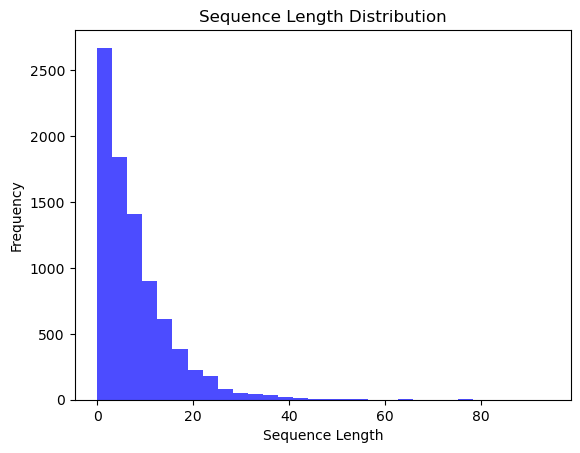

Chosen MAX_LENGTH: 15


In [100]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_list)
sequences = tokenizer.texts_to_sequences(text_list)

# Calculate the lengths of the sequences
sequence_lengths = [len(seq) for seq in sequences]

# Plot a histogram of the sequence lengths
plt.hist(sequence_lengths, bins=30, alpha=0.7, color='b')
plt.title('Sequence Length Distribution')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

# Choose an appropriate MAX_LENGTH based on the distribution
max_length = 15  # Adjust this value based on the histogram and your requirements
print(f"Chosen MAX_LENGTH: {max_length}")

In [239]:
VOCABULARY_SIZE = 10533
EMBEDDING_DIM = 32
MAX_LENGTH = 94
PADDING_TYPE = "post"
TRUNC_TYPE = "post"

In [240]:
from tensorflow.keras.preprocessing.text import Tokenizer


In [241]:
tokenizer = Tokenizer(num_words = VOCABULARY_SIZE)

In [242]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample text data
text_data =  train_df['text']

# Initialize the CountVectorizer
vectorizer = CountVectorizer()
#unique_word = vectorizer.get_feature_names_out()
#unique_word
# Fit and transform the text data
X = vectorizer.fit_transform(text_data)

# Convert to an array
X_array = X.toarray()

# Print the vocabulary and the array
print("Vocabulary:")
print(vectorizer.get_feature_names_out())
print("\nArray:")
print(X_array)

Vocabulary:
['aa' 'aaa' 'aaaa' ... 'zyada' 'zyatti' 'zyattiyan']

Array:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [243]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming train_features is defined as the list of text data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_features)

# X_train is now the matrix of token counts for the train_features
X_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [244]:
# Get the vocabulary
vocabulary = vectorizer.get_feature_names_out()

# Access the vectors for each word in the vocabulary
for word in vocabulary:
    word_index = vectorizer.vocabulary_.get(word)
    word_vector = X_train[:, word_index].toarray()
    #print(f"Word: {word}, Vector: {word_vector}")

In [245]:
X_train

<8506x10533 sparse matrix of type '<class 'numpy.int64'>'
	with 63117 stored elements in Compressed Sparse Row format>

In [246]:
unique_vocab

array(['aa', 'aaa', 'aaaa', ..., 'zyada', 'zyatti', 'zyattiyan'],
      dtype=object)

In [247]:
# Example of creating a word_index dictionary
word_index = {}
index = 1  # Start indexing from 1 to avoid conflicts with 0 as padding

# Assuming unique_words is a list of unique words
unique_words =unique_vocab # Replace with your list of unique words

for word in unique_words:
    word_index[word] = index
    index += 1


In [248]:
#word_index

In [249]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming you have 'train_sequences', 'MAX_LENGTH', 'PADDING_TYPE', and 'TRUNC_TYPE' defined
# Adjust the values as needed

# Padding the sequences
train_padded = pad_sequences(X_array, maxlen=MAX_LENGTH, padding=PADDING_TYPE, truncating=TRUNC_TYPE)


In [250]:
train_padded[150]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [251]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])


In [252]:
#reverse_word_index

In [253]:
def decode_sentence(text):
    """
    Function: Reverse tokenization
    
    Arguments: List of tokens
    
    Returns: A list of strings
    """
    return " ".join([reverse_word_index.get(i, "?") for i in text])

In [254]:
print(decode_sentence(train_padded[150]))
print(train_features[150])

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
ayy dekho dekho


In [256]:
validation_sequences = tokenizer.texts_to_sequences(validation_features)

In [257]:
validation_padded = pad_sequences(validation_sequences, maxlen = MAX_LENGTH, padding = PADDING_TYPE, truncating = TRUNC_TYPE)

# Building and training a Neural Network¶


In [258]:
OUTPUT_SHAPE = len(set(train_labels))

In [259]:
OUTPUT_SHAPE

8

In [260]:
import tensorflow as tf

In [261]:
tf.keras.backend.clear_session()

In [262]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, MaxPooling1D, LSTM, Dense


In [263]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, MaxPooling1D, LSTM, Dense

# Ensure that VOCABULARY_SIZE, EMBEDDING_DIM, MAX_LENGTH, and OUTPUT_SHAPE are defined

model = Sequential([
        Embedding(VOCABULARY_SIZE, EMBEDDING_DIM, input_length=MAX_LENGTH),
        Dropout(0.2),
        Conv1D(filters=128, kernel_size=3, activation="relu"),
        MaxPooling1D(pool_size=2),  # Adjust pool_size according to the input dimensions
        Conv1D(filters=128, kernel_size=3, activation="relu"),
        MaxPooling1D(pool_size=2),  # Adjust pool_size according to the input dimensions
        LSTM(128),
        Dense(128, activation="relu"),
        Dropout(0.2),
        Dense(64, activation="relu"),
        Dense(OUTPUT_SHAPE, activation="softmax")
])

# Compile and fit the model as needed


In [264]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 94, 32)            337056    
                                                                 
 dropout (Dropout)           (None, 94, 32)            0         
                                                                 
 conv1d (Conv1D)             (None, 92, 128)           12416     
                                                                 
 max_pooling1d (MaxPooling1  (None, 46, 128)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 44, 128)           49280     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 22, 128)           0         
 g1D)                                                   

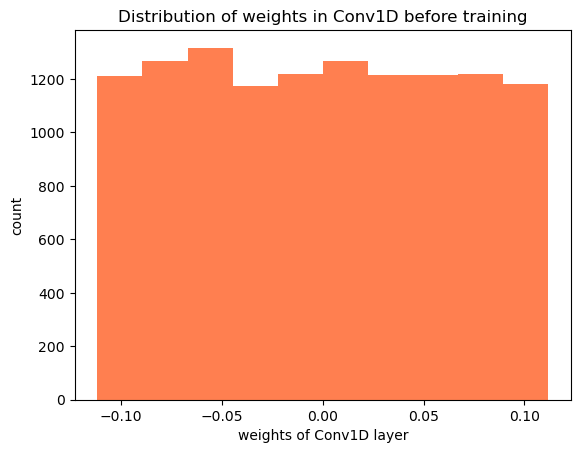

In [265]:
plt.hist(model.layers[2].get_weights()[0].ravel(), color = "coral")
plt.xlabel("weights of Conv1D layer")
plt.ylabel("count")
plt.title("Distribution of weights in Conv1D before training")
plt.show()


In [266]:
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate = 0.0001)


In [267]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = OPTIMIZER,
              metrics = ["accuracy"])

In [268]:
history = model.fit(train_padded, train_labels,
                    epochs = 150,
                    validation_data = (validation_padded, validation_labels),
                    batch_size = 64)

Epoch 1/150
133/133 [==============================] - 6s 34ms/step - loss: 1.7953 - accuracy: 0.4531 - val_loss: 1.6611 - val_accuracy: 0.4675
Epoch 2/150
133/133 [==============================] - 4s 32ms/step - loss: 1.6498 - accuracy: 0.4596 - val_loss: 1.6573 - val_accuracy: 0.4675
Epoch 3/150
133/133 [==============================] - 4s 31ms/step - loss: 1.6491 - accuracy: 0.4596 - val_loss: 1.6517 - val_accuracy: 0.4675
Epoch 4/150
133/133 [==============================] - 4s 31ms/step - loss: 1.6475 - accuracy: 0.4596 - val_loss: 1.6552 - val_accuracy: 0.4675
Epoch 5/150
133/133 [==============================] - 4s 31ms/step - loss: 1.6479 - accuracy: 0.4596 - val_loss: 1.6465 - val_accuracy: 0.4675
Epoch 6/150
133/133 [==============================] - 4s 31ms/step - loss: 1.6460 - accuracy: 0.4596 - val_loss: 1.6530 - val_accuracy: 0.4675
Epoch 7/150
133/133 [==============================] - 4s 31ms/step - loss: 1.6444 - accuracy: 0.4596 - val_loss: 1.6601 - val_accuracy:

In [269]:
def plot_graphs(history, string):
    """
    Function: Displays changes in monitored loss and metrics during model training
    
    Arguments: monitoring logs
    
    Returns: A line graph with changes of loss and metrics over time
    """
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

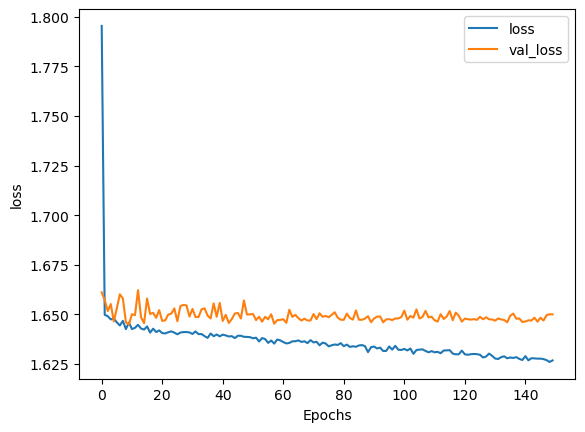

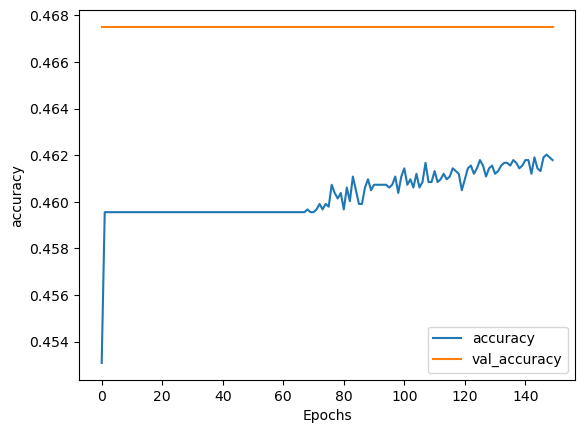

In [270]:
plot_graphs(history, "loss")
plot_graphs(history, "accuracy")

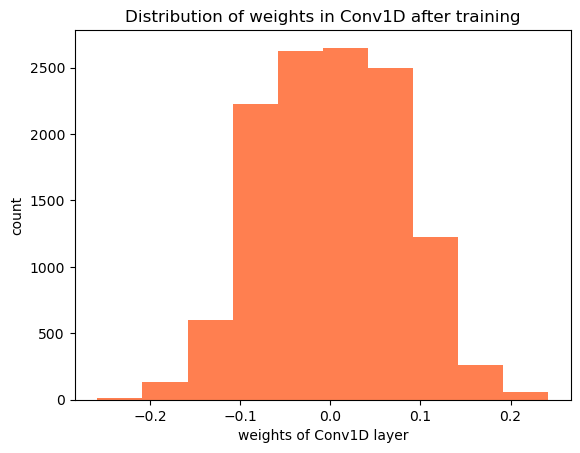

In [271]:
plt.hist(model.layers[2].get_weights()[0].ravel(), color = "coral")
plt.xlabel("weights of Conv1D layer")
plt.ylabel("count")
plt.title("Distribution of weights in Conv1D after training")
plt.show()

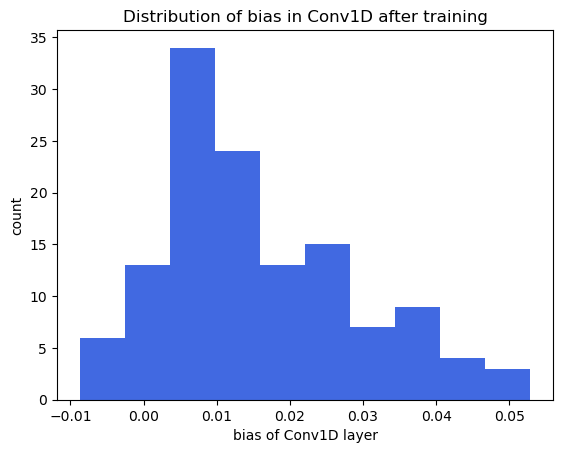

In [272]:
plt.hist(model.layers[2].get_weights()[1].ravel(), color = "royalblue")
plt.xlabel("bias of Conv1D layer")
plt.ylabel("count")
plt.title("Distribution of bias in Conv1D after training")
plt.show()

In [273]:
loss, accuracy = model.evaluate(validation_padded, validation_labels)

43/43 [==============================] - 0s 7ms/step - loss: 1.6500 - accuracy: 0.4675


In [274]:
print(f"Model accuracy is {accuracy * 100}%")

Model accuracy is 46.7503696680069%


In [275]:
predicted_proba = np.argmax(model.predict(validation_padded), axis =-1)

43/43 [==============================] - 1s 8ms/step


In [276]:
predicted_proba

array([5, 5, 5, ..., 5, 5, 5])

In [277]:
validation_labels

array([5, 5, 5, ..., 6, 5, 3])

In [278]:
confusion_matrix = tf.math.confusion_matrix(validation_labels, predicted_proba).numpy()

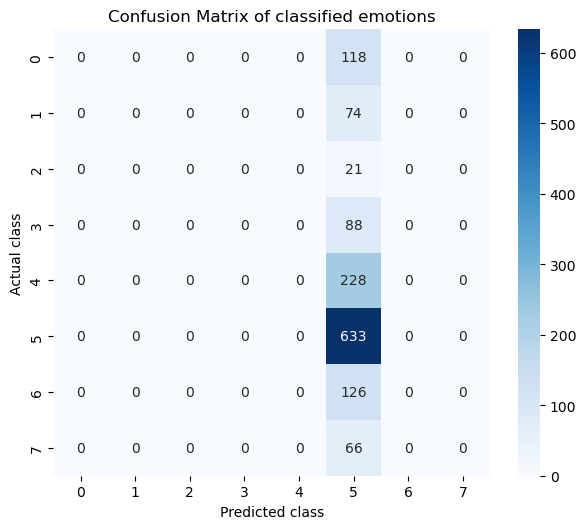

In [279]:
figure = plt.figure(figsize = (6, 5))
sns.heatmap(confusion_matrix, annot = True, fmt = ".0f", cmap = plt.cm.Blues)
plt.tight_layout()
plt.ylabel("Actual class")
plt.xlabel("Predicted class")
plt.title("Confusion Matrix of classified emotions")
plt.show()